In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb

from revasc import Revasc

In [2]:
revasc = Revasc(cpu=True)

In [3]:
revasc.load(model_path="../models/revasc_mimic/")

In [4]:
ecg_list = []

for case_nr in ["49036311", "40043516"]:
    filepath = f"../data_demo_ecg/{case_nr}"
    data= np.asarray(wfdb.rdsamp(filepath)[0]).T.reshape((1, 12, 5000))
    # sampling rate to 100 HZ and switch leads to match up with control cohort Lano
    ecg_list.append(data[:, [0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11], ::5])
ecg = np.concatenate(ecg_list, axis=0)

In [5]:
revasc.predict_proba(ecg)

array([[9.9929875e-01, 7.0133677e-04],
       [9.0428430e-01, 9.5715761e-02]], dtype=float32)

In [6]:
risks = revasc.predict_risk(ecg)

In [7]:
risks

array(['low risk', 'high risk'], dtype='<U9')

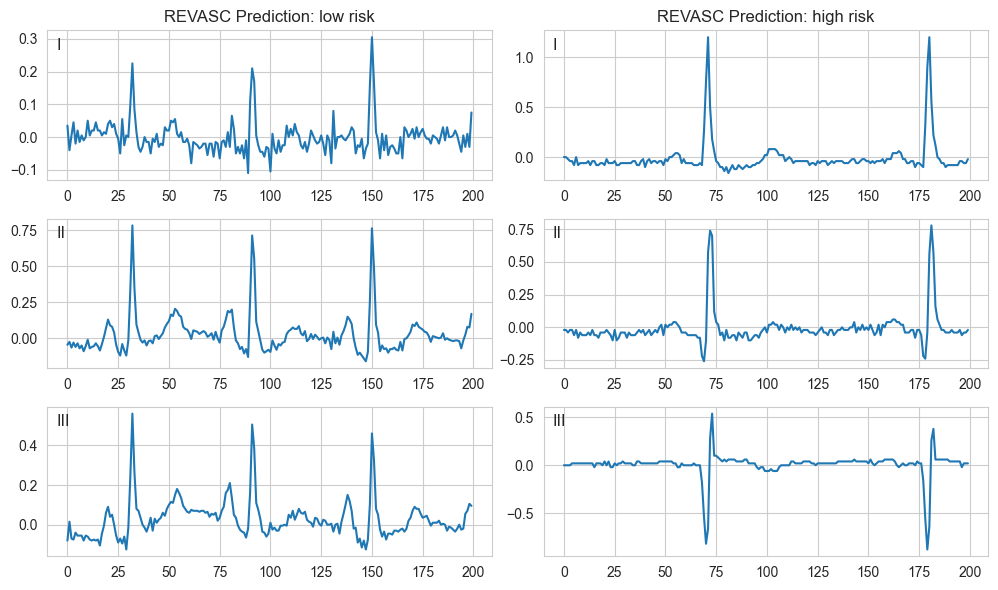

In [8]:
plt.figure(figsize=(10,6))
lead = ["I", "II", "III"]
for i in range(3):
    ax = plt.subplot(321+2*i)
    if i ==0:
        plt.title(f"REVASC Prediction: {risks[0]}")
    ax.plot(ecg[0, i, 300:500])
    # Text in der oberen linken Ecke platzieren (Koordinaten im Achsen-System)
    ax.text(0.02, 0.95, lead[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')
    
    ax = plt.subplot(322+2*i)
    if i ==0:
        plt.title(f"REVASC Prediction: {risks[1]}")
    ax.plot(ecg[1, i, 300:500])
    ax.text(0.02, 0.95, lead[i], transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()